# Εισαγωγή στη Βαθιά Μάθηση

Η Βαθιά Μάθηση ([Deep Learning](https://en.wikipedia.org/wiki/Deep_learning)) είναι μια υποκατηγορία της Μηχανικής Μάθησης που εστιάζει στην εκμάθηση υψηλού επιπέδου αναπαραστάσεων των δεδομένων. Το "βάθος" αναφέρεται στην αρχιτεκτονική των μοντέλων, τα οποία έχουν πολλαπλά κρυμμένα επίπεδα.

![](https://cdn-images-1.medium.com/max/1600/1*5egrX--WuyrLA7gBEXdg5A.png)

Σκοπός των πολλαπλών κρυμμένων επιπέδων είναι η εκμάθηση ολοένα και πιο αφηρημένων χαρακτηριστικών.

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/04/04085912/dl4.png)

Η πιο διαδεδομένη βιβλιοθήκη για deep learning είναι η [TensorFlow](https://www.tensorflow.org/), η οποία σχεδιάστηκε και υποστηρίζεται από τη Google. Η TensorFlow είναι μια βιβλιοθήκη συμβολικών μαθηματικών με πολύ υλικό για Machine Learning, ενώ υποστηρίζει και δυνατότητα επεξεργασίας σε GPU.

In [1]:
!pip install --upgrade tensorflow
from __future__ import division
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

    100% |████████████████████████████████| 40.8MB 24kB/s  eta 0:00:01
Requirement already up-to-date: numpy>=1.12.1 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from tensorflow)
    100% |████████████████████████████████| 6.4MB 150kB/s eta 0:00:01
Requirement already up-to-date: six>=1.10.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from tensorflow)
    100% |████████████████████████████████| 51kB 5.8MB/s eta 0:00:01
Requirement already up-to-date: mock>=2.0.0 in /usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages (from tensorflow)
    100% |████████████████████████████████| 1.7MB 631kB/s eta 0:00:01
    100% |████████████████████████████████| 491kB 976kB/s eta 0:00:01
Requirement already up-to-date: funcsigs>=1; python_version < "3.3" in /usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packa

## Λεξιλόγιο

### Tensor

Ο τανυστής ([Tensor](https://en.wikipedia.org/wiki/Tensor)) είναι μια μαθηματική έννοια που αναπαριστά ένα πολυδιάστατο διάνυσμα. Έχουμε ξανασυναντήσει και στο παρελθόν τέτοια αντικείμενα, μόνο που αναφερόμασταν σε αυτούς με [διαφορετικό όνομα](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html). Ένας αριθμός μπορεί να θερωρηθεί ως ένας τανυστής μηδενικής διάστασης, ένα διάνυσμα είναι ένας τανυστής μιας διάστασης, ένας πίνακας είναι ένας τανυστής δύο διαστάσεων, κτλ. Στην πράξη, μέσω της βιβλιοθήκης TensorFlow θα χρησιμοποιούμε τους τανυστές για να αποθηκεύουμε πληροφορία στα διάφορα σημεία του μοντέλου.

### [Graph](https://www.tensorflow.org/api_docs/python/tf/Graph)

Η βιβλιοθήκη αναπαριστά τις πράξεις μεταξύ των τανυστών ως γράφους (computation graphs). Οι κόμβοι του γράφου αναπαριστούν τις πράξεις (operations), ενώ οι ακμές τους διάφορους τανυστές που είτε δίνουμε ως είσοδο είτε προκύπτουν ως το αποτέλεσμα μιας πράξης. Για παράδειγμα έστω ότι θέλουμε να πολλαπλασιάσουμε 2 πίνακες $output\_tensor = tensor\_1 \cdot tensor\_2$, το TensorFlow θα δημιουργήσει τον παρακάτω γράφο:
![](https://cdn-images-1.medium.com/max/800/1*mvhm5_r6LY-eHsin21RJTg.png)
Το TensorFlow **δεν θα εκτελέσει καμία πράξη, χωρίς να του το πούμε ρητά!**. Αν θέλουμε να δούμε το αποτέλεσμα της πράξης θα πρέπει να ορίσουμε ένα ειδικό περιβάλλον που ονομάζεται Session.

### [Session](https://www.tensorflow.org/api_docs/python/tf/Session)

Το Session είναι ένα περιβάλλον μέσω του οποίου μπορούμε να εκτελούμε τις πράξεις μέσα σε έναν υπολογιστικό γράφο. Η ροή της πληροφορίας μέσα στους τανυστές του γράφου είναι αυτή που έδωσε και το όνομα στη βιβλιοθήκη. Η χρήση των Session επιτρέπει στη βιβλιοθήκη να κρύψει την αρχιτεκτονική του συστήματος από το χρήστη (π.χ. αν θα εκτελεστούν οι πράξεις σε CPU ή σε GPU). 


### [tf.Tensor](https://www.tensorflow.org/programmers_guide/tensors)

Υπάρχουν 3 ειδών τανυστές που μπορούμε να ορίσουμε στο tensorflow.

#### [Constants](https://www.tensorflow.org/api_docs/python/tf/constant)

Χρησιμοποιούνται για την αποθήκευση σταθερών οι οποίες δεν έχουν σκοπό να αλλάξουν στη διάρκεια του προγράμματος.

#### [Variables](https://www.tensorflow.org/api_docs/python/tf/Variable)

Χρησιμοποιούνται για την αποθήκευση μεταβλητών οι οποίες πρέπει να έχουν κάποια αρχική τιμή. Στην πράξη αποθηκεύουμε τους πίνακες με τα βάρη ($W$ και $b$) των διαφόρων επιπέδων του δικτύου σε tf.Variables.

#### [Placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder)

Χρησιμοποιούνται για την τροφοδοσία μεταβλητών μέσα στο γράφο, οι οποίες δεν χρειάζεται να αρχικοποιηθούν. Στην πράξη συνήθως οι τανυστές εισόδου είναι tf.Placeholders.

## Αριθμητικό παράδειγμα

Ας πούμε ότι θέλουμε να πολλαπλασιάσουμε 2 αριθμούς μέσα στο TensorFlow.

In [4]:
a = tf.constant(12, name='a') # ορίζουμε 2 tf.constant μια με τιμή 5
b = tf.constant(3, name='b') # και την άλλη με τιμή 3
c = a * b # πολλαπλασιάζουμε τους 2 αυτούς τανυστές
print a, b, c # εκτυπώνουμε το αποτέλεσμα

Tensor("a_1:0", shape=(), dtype=int32) Tensor("b_1:0", shape=(), dtype=int32) Tensor("mul_1:0", shape=(), dtype=int32)


Αυτό που κάνει το TensorFlow με τις παραπάνω εντολές είναι να ορίσει έναν υπολογιστικό γράφο με έναν κόμβο (την πράξη του πολλαπλασιασμού). Το c είναι ένας Tensor, ο οποίος δεν έχει τιμή! Θα αποκτήσει την τιμή μόλις πούμε στο TensorFlow να κάνει τις πράξεις. Πώς το κάνουμε αυτό;

Θα χρειαστεί να ορίσουμε ένα περιβάλλον που ονομάζουμε tf.Session.

In [5]:
sess = tf.Session() # ορίζουμε το session
print sess.run(c) # λέμε στο TensorFlow να χρησιμοποιήσει το sess για να εκτελέσει όλες τις πράξεις που ορίζει ο υπολογιστικός γράφος του c
sess.close() # τερματίζουμε το session

36


Υπάρχει και ένα δεύτερο είδος Session στο TensorFlow, το [InteractiveSession](https://www.tensorflow.org/api_docs/python/tf/InteractiveSession), το οποίο βοηθάει σε διαδραστικά περιβάλλοντα όπως το Jupyter Notebook. Για λόγους απλότητας όμως δεν θα το χρησιμοποιήσουμε. 

### Μεταβλητές στο TensorFlow

Σε αντίθεση με τις σταθερές οι μεταβλητές μπορούν να αλλάξουν τιμή. Όπως και στις σταθερές πρέπει να ορίσουμε μια αρχική τιμή την οποία θα πάρουν, χρειάζονται όμως ρητή αρχικοποίηση από τον χρήστη μέσω μιας εντολής που θα δούμε παρακάτω. 

In [8]:
a = tf.Variable([1,2]) # ορίζουμε τις μεταβλητές καθώς και την τιμή 
b = tf.Variable([5,6]) # που θα πάρουν μόλις αυτές αρχικοποιηθούν

c = a * b

with tf.Session() as sess: # εναλλακτικός τρόπος ορισμού Session
    sess.run(tf.global_variables_initializer()) # αρχικοποιούμε όλες τις μεταβλητές εδώ
    print sess.run(c)

[ 5 12]


## Νευρωνικά Δίκτυα στο TensorFlow

Όπως μπορείτε να φανταστείτε το TensorFlow αναπαριστά κάθε δίκτυο ως έναν πολύπλοκο υπολογιστικό γράφο. Κάθε επίπεδο του δικτύου ουσιαστικά εκτελεί την πράξη:  $f \left( x \cdot W + b \right) $, όπου $W$ και $b$ οι πίνακες με τα βάρη, $x$ η είσοδος του επιπέδου και $f$ η συνάρτηση ενεργοποίησης. Το αποτέλεσμα της πράξης αυτό τροφοδοτείται στο επόμενο επίπεδο του δικτύου και ούτω καθεξής... 

Κατά την εκπαίδευση του δικτύου, η πληροφορία διαδίδεται με 2 τρόπους. Πρώτα το δίκτυο δέχεται την είσοδο ($Χ$) και εκτελεί τις πράξεις για να παράγει την έξοδο ($\hat y$). Η διάδοση εδώ της πληροφορίας γίνεται από την είσοδο του δικτύου προς την έξοδό του και αποκαλείται Forward Propagation. Η έξοδος του δικτύου συγκρίνεται με την αναμενόμενη έξοδο (label $y$), με τη βοήθεια μιας συνάρτησης κόστους (cost function $L$), την οποία θέλουμε και να ελαχιστοποιήσουμε. Για να το πετύχουμε αυτό, σε κάθε βήμα της εκπαίδευσης ενημερώνουμε τα βάρη του κάθε επιπέδου του δικτύου ως εξής:

$$
w \leftarrow w - η \cdot \frac{dL \left( y, \hat y\right)}{dw} \\
b \leftarrow b - η \cdot \frac{dL \left( y, \hat y\right)}{db}
$$

Επειδή η πληροφορία εδώ διαδίδεται από την έξοδο του δικτύου προς τα πρώτα του επίπεδα, η διαδικασία αυτή αποκαλείται Back Propagation.

Το TensorFlow χειρίζεται μόνο του όλη τη διαδικασία της εκπαίδευσης (παραγωγή εξόδου, υπολογισμός σφάλματος, ενημέρωση βαρών), αρκεί να ορίσουμε σωστά την αρχιτεκτονική, τις υπερπαραμέτρους, τη συνάρτηση κόστους και την τεχνική βελτιστοποίησης.

### Δημιουργία απλού Νευρωνικού Δικτύου ενός επιπέδου

Θα υλοποιήσουμε ένα απλό νευρωνικό δίκτυο και θα προσπαθήσουμε να το εκπαιδεύσουμε στο [MNIST](http://yann.lecun.com/exdb/mnist/), το οποίο είναι ένα dataset από εικόνες χειρόγραφων ψηφίων (0-9). Ο υπολογιστής την κάθε εικόνα την ερμηνεύει ως έναν πίνακα, κάθε στοιχείο του οποίου υποδηλώνει την ένταση του αντίστοιχου pixel στην εικόνα.

![](https://ujwlkarn.files.wordpress.com/2016/08/8-gif.gif?w=192&h=192&zoom=2)

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Το dataset έχει 55000 εικόνες για train, 10000 για test. Κάθε εικόνα είναι ασπρόμαυρη και έχει διαστάσεις 28x28=784 pixel. Προφανώς κάθε εικόνα συνοδεύεται και από το label της το οποίο είναι σε μορφή one-hot vector. Δηλαδή το κάθε label είναι ένα διάνυσμα 10 στοιχείων με 9 μηδενικά και έναν άσο, η θέση του οποίου υποδηλώνει το ποιο ψηφίο είναι. Για παράδειγμα το ψηφίο $6$ θα έχει ένα one-hot vector της μορφής $\left[ 0, 0, 0, 0, 0, 0, 1, 0, 0, 0 \right]$

Train shape: (55000, 784)
Test shape: (10000, 784)


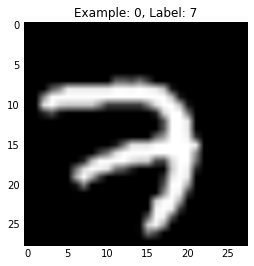

In [19]:
ind = 0
plt.imshow(mnist.train.images[ind, :].reshape((28,28)), cmap='gray')
plt.title('Example: {}, Label: {}'.format(ind, mnist.train.labels[ind].argmax()))
print 'Train shape:', mnist.train.images.shape
print 'Test shape:', mnist.test.images.shape

Από τη δεύτερη διάσταση που είναι 784, βλέπουμε ότι ο πίνακας έχει μετατραπεί σε διάνυσμα ([flatten](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html)). Η διαδικασία αυτή είναι αντριστρέψιμη μέσω του [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

Επειδή στα περισσότερα προβλήματα αναγνώρισης εικόνας έχουμε μεγάλο όγκο δεδομένων, δεν θέλουμε ποτέ να φορτώσουμε όλες τις εικόνες στη μνήμη. Αντί για αυτό φορτώνουμε ένα μικρό αριθμό εικόνων (batch) και τρέχουμε μια επανάληψη πάνω σε αυτό. Στη συνέχεια κάνουμε το ίδιο σε διαφορετικό batch, κοκ. 

Για να το εφαρμόσουμε αυτό στην πράξη θα χρειαστούμε μια μεταβλητή εισόδου που θα κρατάει κάθε φορά διαφορετικό batch εικόνων. Η διάσταση της μεταβλητής αυτής πρέπει να είναι $(batch \: size) \times (pixels \: per \: image)$. Θα χρησιμοποιήσουμε placeholder μεταβλητή για 2 λόγους: 1ον γιατί δεν χρειάζεται αρχικοποίηση και 2ον γιατί το TensorFlow μας επιτρέπει να μην ορίσουμε το μέγεθος των διαστάσεων εκ των πρωτέρων. Το αντίστοιχο κάνουμε και για τα labels.

In [20]:
x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

Το πρώτο μοντέλο που θα φτιάξουμε είναι ένα νευρωνικό δίκτυο ενός επιπέδου. 

![](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/d5222c6e3d15770a.png)

Το δίκτυο αυτό εκτελεί πρώτα την πράξη $W \cdot x + b$ και περνάει το αποτέλεσμά της μέσα από μια συνάρτηση ενεργοποίησης  $\, f$. Τελικά η έξοδος του δικτύου θα είναι $\hat y = f \left( x \cdot W + b \right) $. Για το μοντέλο αυτό θα χρειαστούμε 2 πίνακες για τις παραμέτους $W$ και $b$ για τους οποίους θα χρησιμοποιήσουμε tf.Variables. Για να πάρουμε από μια είσοδο $(batch \: size) \times 784$ έξοδο διαστάσεων $(batch \: size) \times 10$ πρέπει ο πίνακας $W$ να είναι διαστάσεων $784 \times 10$. Ο πίνακας $b$ κανονικά πρέπει να έχει διαστάσεις $(batch \: size) \times 10$ όμως συνήθως τον ορίζουμε $10 \times 1$ και αφήνουμε το broadcasting να τον φέρει στη σωστή διάσταση. Η πράξη που θα γίνει στην περίπτωσή μας δηλαδή είναι η ακόλουθη:

$$
z = \left( \begin{array}{ccc}
x_{1,1} & x_{1,2} & ... & x_{1,784} \\
x_{2,1} & x_{2,2} & ... & x_{2,784} \\
... & ... & ... & ... \\
x_{N,1} & x_{N,2} & ... & x_{N,784}
\end{array}\right) 
\cdot
\left( \begin{array}{ccc}
W_{1,1} & W_{1,2} & ... & W_{1,10} \\
W_{2,1} & W_{2,2} & ... & W_{2,10} \\
... & ... & ... & ... \\
W_{784,1} & W_{784,2} & ... & W_{784,10}
\end{array}\right)
+
\left( \begin{array}{c}
b_{1} & b_{2} & ... & b_{10} 
\end{array}\right)
$$

Όπου $N = batch \: size$. Αυτό στο TensorFlow μπορούμε να το ορίσουμε ως εξής:

In [21]:
W = tf.Variable(tf.zeros((784,10)))
b = tf.Variable(tf.zeros((10)))
z = tf.matmul(x, W) + b

Ως συνάρτηση ενεργοποίησης θα χρησιμοποιήσουμε την [softmax](https://en.wikipedia.org/wiki/Softmax_function). 

$$
softmax(z_{i,j}) = \frac{e^{z_{i,j}}}{\sum_{k=1}^{10}{e^{z_{k, j}}}}
$$

Ουσιαστικά το softmax, για κάθε διάνυσμα εξόδου $z_j, \: j = 1, ..., N$ εκτελεί την πράξη $e^{z_{i,j}}, \:  i = 1, ..., 10$ και κανονικοποιεί το αποτέλεσμα. Με αυτόν τον τρόπο παίρνουμε ως αποτέλεσμα την πιθανότητα μια εικόνα να ανήκει στην κάθε κατηγορία.

Το αποτέλεσμα του softmax είναι και η τελική έξοδος του δικτύου $\hat y = softmax(z)$.

In [22]:
y_hat = tf.nn.softmax(z)

Θέλουμε έναν τρόπο τώρα να συγκρίνουμε πόσο κοντά είναι η έξοδος του δικτύου ($\hat y$) με την πραγματική έξοδο ($y$). Ως συνάρτηση κόστους θα χρησιμοποιήσουμε την [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy). 

$$
cross \: entropy(\hat y, y) = - \sum_i{y_i \cdot log(\hat y_i)}
$$

Μια καλή εισαγωγή στο τι υπολογίζει αυτή η συνάρτηση θα βρείτε [εδώ](http://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/).

In [23]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

Σημείωση: Θα μπορούσαμε να παραλείψουμε τα προηγούμενα 2 βήματα χρησιμοποιώντας την [έτοιμη συνάρτηση](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) του TensorFlow για τον υπολογισμό του softmax και του cross entropy, την οποία θα συντάσσαμε ως εξής:

```
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=z, labels=y))
```

Τελευταίο βήμα (και τελευταίο επίπεδο του υπολογιστικού γράφου του TensorFlow) είναι να ορίσουμε τον αλγόριθμο βελτιστοποίησης ([optimization algorithm](https://en.wikipedia.org/wiki/Mathematical_optimization#Optimization_algorithms)). Τον αλγόριθμο δηλαδή που θα αναλάβει την ελαχιστοποίηση της συνάρτησης κόστους. Συνήθως στη Μηχανική Μάθηση χρησιμοποιούμε αλγορίθμους [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent). Μια καλή ανασκόπηση των αλγορίθμων Gradient Descent θα βρείτε [εδώ](http://ruder.io/optimizing-gradient-descent/).

Το TensorFlow παρέχει [πολλούς αλγορίθμους](https://www.tensorflow.org/api_guides/python/train#Optimizers) βελτιστοποίησης. Εμείς θα χρησιμοποιήσουμε τον πιο απλό. 

In [24]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy) # learning rate = 0.5

Με την παραπάνω εντολή ολοκληρώνουμε και τον υπολογιστικό γράφο. Τη ροή της πληροφορίας μέσα στο γράφο μπορούμε να τη δούμε στο παρακάτω σχήμα:

![](https://www.tensorflow.org/images/tensors_flowing.gif)

Τέλος, Θέλουμε και μια συνάρτηση να τυπώνει το accuracy. Στο TensorFlow αυτή μπορούμε να τη γράψουμε ως εξής:

In [25]:
correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Το μόνο πράγμα που μένει είναι να βρούμε έναν τρόπο να τροφοδοτούμε τις εικόνες στο δίκτυό μας. Είπαμε προηγουμένως ότι οι εικόνες θα μπούνε στο placeholder $x$ και τα αντίστοιχα labels στον πίνακα $y$ . Αυτό γίνεται μέσω ενός dictionary (`feed_dict`) που θα αντιστοιχίζει ποια μεταβλητή θα μπει πού.

Είμαστε έτοιμοι τώρα να εκπαιδεύσουμε τον αλγόριθμό μας!

In [34]:
batch_size = 64
epochs = 1001
with tf.Session() as sess:
    
    loss_tr, acc_tr, loss_ts, acc_ts = [], [], [], []
    
    sess.run(tf.global_variables_initializer()) # αρχικοποίηση μεταβλητών
    
    for step in range(1, epochs): # πόσα βήματα θέλουμε κάνει ο αλγόριθμος
        
        x_batch, y_batch = mnist.train.next_batch(batch_size) # παίρνουμε ένα batch από τα training data του mnist. Κάνει shuffle από μόνο του!  
        sess.run(optimizer, feed_dict={x: x_batch, y: y_batch}) # τρέχουμε το γράφο που ορίζει τον optimizer για ένα βήμα. Αυτό όπως αναφέραμε προηγουμένως
                                                                # χειρίζεται όλη την εκπαίδευση (παραγωγή εξόδου, υπολογισμό σφάλματος, ενημέρωση βαρών)
                                                                # Στο feed_dict ορίζουμε σε ποια μεταβλητή του γράφου θα τροφοδοτείται ποιο πράγμα. 
        
        # Για τις γραφικές
        l_tr, a_tr = sess.run([cross_entropy, accuracy], feed_dict={x: x_batch, y: y_batch})
        l_ts, a_ts = sess.run([cross_entropy, accuracy], feed_dict={x: mnist.test.images, y: mnist.test.labels})
        loss_tr.append(l_tr)
        acc_tr.append(a_tr)
        loss_ts.append(l_ts)
        acc_ts.append(a_ts)
    
    weights = sess.run(W) # αποθηκεύουμε τον πίνακα με τα βάρη     
    print 'Test Accuracy =', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}) # υπολογίζουμε το τελικό accuracy στο test set

Test Accuracy = 0.9194


Το απλό μας σύστημα έπιασε ένα accuracy της τάξης του 91%. Θα προσπαθήσουμε να το βελτιώσουμε αυτό στη συνέχεια με πιο βαθιά μοντέλα.

Ας σχεδιάσουμε τα γραφήματα των loss και accuracy στο test set σε κάθε βήμα της εκπαίδευσης. 

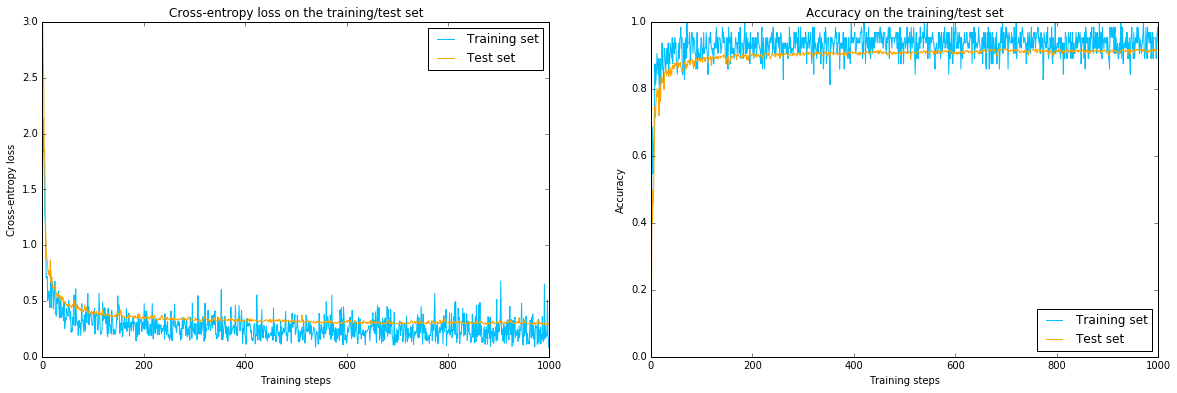

In [35]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs), loss_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,epochs), loss_ts, c='orange', label='Test set')
plt.legend()
plt.title('Cross-entropy loss on the training/test set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs), acc_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,epochs), acc_ts, c='orange', label='Test set')
plt.legend(loc='lower right')
plt.title('Accuracy on the training/test set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')

Όπως αναμενόταν το σφάλμα μειώνεται όσο εκπαιδεύεται το σύστημα ενώ το accuracy αυξάνεται.

Όπως είδαμε ο πίνακας βαρών $W$ είναι ένας πίνακας διαστάσεων $784 \times 10$. Μπορούμε να οπτικοποιήσουμε τα βάρη για κάθε νευρώνα (0-9) διατάσσοντας τα 784 στοιχεία σε μια εικόνα 28x28 pixel.

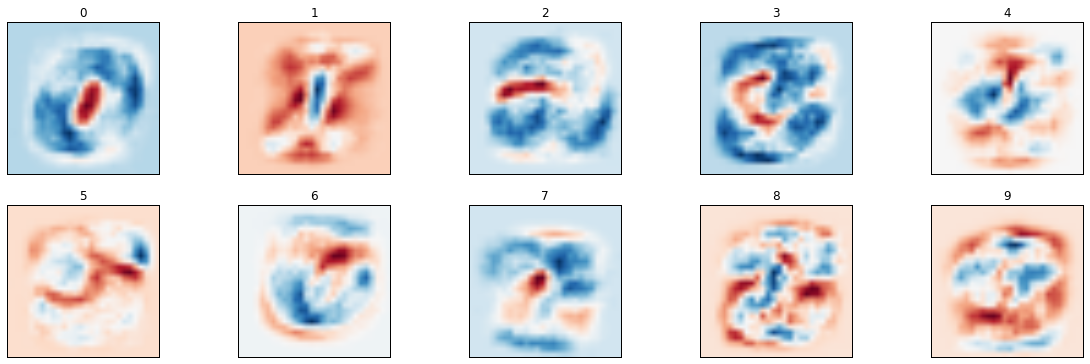

In [36]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[:,i].reshape([28,28])
    plt.title(i)
    plt.imshow(weight, cmap='RdBu')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

Στην παραπάνω εικόνα, τα βάρη που συμβάλλουν θετικά στην κατηγοριοποίηση εμφανίζονται με μπλε ενώ αυτά που συμβάλλουν αρνητικά με κόκκινο. Χαρακτηριστικά είναι τα πρώτα 2 ψηφία (0 και 1).

### Πολυεπίπεδα Νευρωνικά Δίκτυα

Τώρα που είδαμε πως λειτουργεί το ένα επίπεδο του δικτύου, μπορούμε να προσθέσουμε στο δίκτυό μας περισσότερα επιπεδα για να βελτιώσουμε την απόδοσή του. Τα επίπεδα αυτά τα αποκαλούμε κρυφά (hidden layers), επειδή δεν παρατηρούμε την έξοδό τους. Το δίκτυο που θα σχεδιάσουμε θα έχει 2 κρυφά επίπεδα και 1 επίπεδο εξόδου.

![](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)


Επειδή στα κρυφά επίπεδα δεν δεσμευόμαστε όσον αφορά τις διαστάσεις, μπορούμε να τα κάνουμε όσο μεγάλα θέλουμε! Εμείς θα επιλέξουμε αυτά να έχουν 200, 100, 60 και 30 νευρώνες αντίστοιχα. Επίσης θα ορίσουμε ως συνάρτηση ενεργοποίησής τους τη [σιγμοειδή](https://en.wikipedia.org/wiki/Sigmoid_function):

$$
sigmoid \left( z \right) = \frac{1}{1 + e^{-z}}
$$

Τα υπόλοιπα (επίπεδο εξόδου, συνάρτηση κόστους, τεχνική βελτιστοποίησης) θα τα αφήσουμε ίδια με πριν.

In [37]:
# Βάρη 1ου κρυφού επιπέδου
W1 = tf.Variable(tf.truncated_normal((784, 100), stddev=0.1))
b1 = tf.Variable(tf.zeros((100)))

# Βάρη 2ου κρυφού επιπέδου
W2 = tf.Variable(tf.truncated_normal((100,30), stddev=0.1))
b2 = tf.Variable(tf.zeros((30)))

# Βάρη επιπέδου εξόδου
W3 = tf.Variable(tf.truncated_normal((30,10), stddev=0.1))
b3 = tf.Variable(tf.zeros((10)))

# Επίπεδα δικτύου
z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)
logits = tf.matmul(z2, W3) + b3 # Το κάνουμε σε 2 βήματα το επίπεδο αυτό γιατί θα χρειαστούμε τα logits παρακάτω
y_hat = tf.nn.softmax(logits)

# Συνάρτηση κόστους και βελτιστοποίηση
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Υπολογισμός accuracy
correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Σημείωση: Όταν γίνονται βαθιά τα δίκτυα, είναι σημαντικό να αρχικοποιούμε τα βάρη από τυχαίες τιμές για να μην κολλήσει η εκπαίδευση στην αρχική της θέση. Η [tf.truncated_normal](https://www.tensorflow.org/api_docs/python/tf/truncated_normal) επιστρέφει τιμές από μια κανονική κατανομή μόνο στο εύρος $(-2σ, +2σ)$, όπου $σ$ η τυπική απόκλιση.

In [38]:
start_time = step_time = time.time()
with tf.Session() as sess:
    
    loss_tr, acc_tr, loss_ts, acc_ts = [], [], [], []
    
    sess.run(tf.global_variables_initializer()) # αρχικοποίηση μεταβλητών
    
    for step in range(1, 5001): # πόσα βήματα θέλουμε κάνει ο αλγόριθμος
        
        x_batch, y_batch = mnist.train.next_batch(batch_size) # παίρνουμε ένα batch από τα training data του mnist. Κάνει shuffle από μόνο του!  
        sess.run(optimizer, feed_dict={x: x_batch, y: y_batch}) # τρέχουμε το γράφο που ορίζει τον optimizer για ένα βήμα. Αυτό όπως αναφέραμε προηγουμένως
                                                                # χειρίζεται όλη την εκπαίδευση (παραγωγή εξόδου, υπολογισμό σφάλματος, ενημέρωση βαρών)
                                                                # Στο feed_dict ορίζουμε σε ποιά μεταβλητή του γράφου θα τροφοδοτείται ποιό πράγμα. 
        
        # Για τις γραφικές
        l_tr, a_tr = sess.run([cross_entropy, accuracy], feed_dict={x: x_batch, y: y_batch})
        l_ts, a_ts = sess.run([cross_entropy, accuracy], feed_dict={x: mnist.test.images, y: mnist.test.labels})
        loss_tr.append(l_tr)
        acc_tr.append(a_tr)
        loss_ts.append(l_ts)
        acc_ts.append(a_ts)
        
        # εκτύπωση της προόδου της εκπαίδευσης
        if step % 500 == 0:
            print 'Step: {:>4}, Time: {:.2f} sec, Loss: {:.2f}, Accuracy: {:.2f}'.format(step, time.time()-step_time, l_ts, a_ts)
            step_time = time.time()
    
    # Accuracy
    print 'Test Accuracy =', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}) # υπολογίζουμε το τελικό accuracy στο test set

print 'Training time:', (time.time()- start_time)/60, 'min'

Step:  500, Time: 26.22 sec, Loss: 0.43, Accuracy: 0.88
Step: 1000, Time: 26.41 sec, Loss: 0.29, Accuracy: 0.92
Step: 1500, Time: 25.50 sec, Loss: 0.25, Accuracy: 0.93
Step: 2000, Time: 26.09 sec, Loss: 0.19, Accuracy: 0.94
Step: 2500, Time: 25.50 sec, Loss: 0.16, Accuracy: 0.95
Step: 3000, Time: 25.92 sec, Loss: 0.16, Accuracy: 0.95
Step: 3500, Time: 25.99 sec, Loss: 0.14, Accuracy: 0.96
Step: 4000, Time: 26.10 sec, Loss: 0.13, Accuracy: 0.96
Step: 4500, Time: 25.98 sec, Loss: 0.12, Accuracy: 0.96
Step: 5000, Time: 25.92 sec, Loss: 0.13, Accuracy: 0.96
Test Accuracy = 0.9587
Training time: 4.32748031616 min


Η προσθήκη ενός κρυφού επιπέδου **βελτίωσε την απόδοση** του συστήματος. Τώρα όμως το σύστημα χρειάζεται **περισσότερο χρόνο** να εκπαιδευτεί. Αυτό συμβαίνει για 2 λόγους: Αφενός με την προσθήκη του επιπλέον επιπέδου προσθέσαμε παραπάνω παραμέτρους προς εκπαίδευση. Αφετέρου όσο πιο βαθύ είναι ένα δίκτυο τόσο πιο πολύπλοκος είναι ο υπολογισμός των παραγώγων του πρώτου επιπέδου. Αν πάμε να αυξήσουμε πολύ παραπάνω τον αριθμό των επιπέδων, θα αυξηθεί πολύ και ο χρόνος εκπαίδευσης.

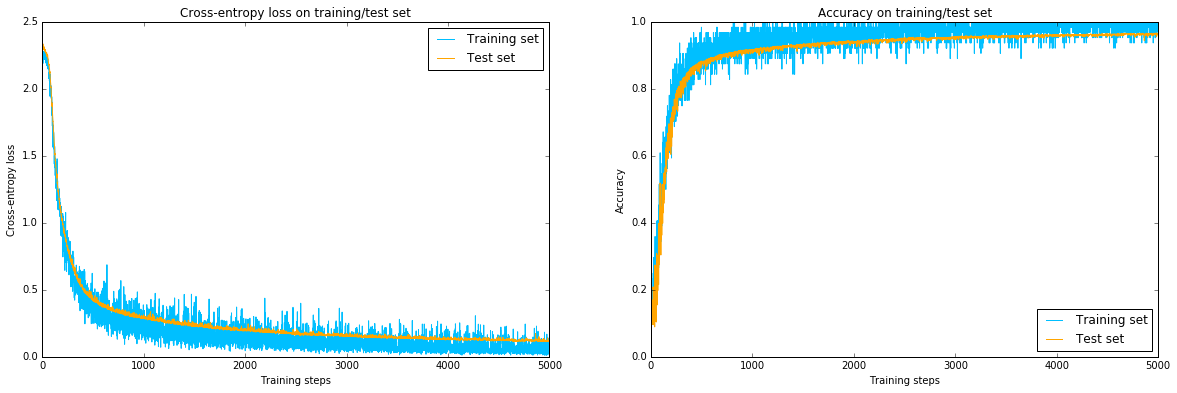

In [39]:
plt.subplot(1, 2, 1)
plt.plot(range(1,5001), loss_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,5001), loss_ts, c='orange', label='Test set')
plt.legend()
plt.title('Cross-entropy loss on training/test set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,5001), acc_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,5001), acc_ts, c='orange', label='Test set')
plt.legend(loc='lower right')
plt.title('Accuracy on training/test set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')

Μπορεί να πετύχαμε ένα accuracy γύρω στο 96%, στο MNIST όμως αυτό δεν είναι καλό. Στη συνέχεια θα δούμε μερικές λίγο πιο εξελιγμένες τεχνικές οι οποίες μπορούν να βελτιώσουν την απόδοση. 

Τα δίκτυα που έχουμε δει τώρα τα ονομάζουμε Πλήρως Διασυνδεμένα (**Fully Connected - FC**) επειδή ο καθένας από τους νευρώνες του ενός επιπέδου έχει συνδέσεις με όλους τους νευρώνες του επόμενου.

## Συνελικτικά Δίκτυα

Τα Συνελικτικά Νευρωνικά Δίκτυα ([Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network)) είναι βαθιά νευρωνικά δίκτυα τα οποία ειδικεύονται στην ανάλυση εικόνων. Τα δίκτυα αυτά συνδυάζουν δυο στοιχεία που επιτρέπουν τη δημιουργία αρχιτεκτονικών με μικρότερο αριθμό παραμέτρων: Την αραιή σύνδεση (**sparse connectivity**) μεταξύ των επιπέδων και τη χρήση κοινών βαρών (**weight sharing**).

Τα δύο κυριότερα είδη επιπέδων στα δίκτυα αυτά είναι τα συνελικτικά (**convolutional**) και τα επίπεδα υποδειγματοληψίας (**pooling**).

### Convolutional Layer

Η βασική χρήση των συνελικτικών επιπέδων είναι η εξαγωγή χαρακτηριστικών από τις εικόνες. Δεν θα ασχοληθούμε με τη [μαθηματική ερμηνεία](https://en.wikipedia.org/wiki/Convolution) της συνέλιξης, θα προσπαθήσουμε να δούμε όμως πώς αυτή εφαμόζεται στην εικόνα. Τη λειτουργία αυτή μπορούμε να τη φανταστούμε ως ένα σταθερό "φίλτρο" που περνάει από μία εικόνα. Ας θεωρήσουμε ότι έχουμε μια εικόνα $5 \times 5$.

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-13-pm.png?w=254&h=230)

Επίσης ορίζουμε το παρακάτω φίλτρο $3 \times 3$.

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=148&h=128)

Η πράξη της συνέλιξης μεταξύ των δυο φαίνεται στο παρακάτω σχήμα.

![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)

Σημείωση: Στην είσοδο των δικτύων αυτών δίνουμε την εικόνα 2 διαστάσεων, καθώς τα δίκτυα αυτά ψάχνουν να βρουν χαρακτηριστικά στο χώρο.

Το αποτέλεσμα της συνέλιξης το ονομάζουμε **feature map**. Διαφορετικά φίλτρα μπορούν να έχουν πολύ [διαφορετική επίδραση][1] πάνω στην εικόνα. Ένα ωραίο παράδειγμα θα βρείτε [εδώ](http://setosa.io/ev/image-kernels/) για τη λειτουργία της συνέλιξης στις εικόνες.

Υπάρχουν 3 παράμετροι που μπορούμε να ελέγξουμε σε ένα συνελικτικό επίπεδο:

- Τον πίνακα με τον οποίο γίνεται η συνέλιξη (συνήθως τον ονομάζουμε φίλτρο ή **kernel**).
- Το βήμα που κάνει ο πίνακας (το ονομάζουμε **stride** και στο προηγούμενο παράδειγμα ήταν 1).
- Το αν θα βγαίνει εκτός των διαστάσεων της εικόνας, προκειμένου να διατηρήσει τις ίδιες διαστάσεις και στην έξοδο (**padding**). 
- Τον αριθμό των διαφορετικών feature maps που θα παραχθούν στο επίπεδο αυτό (συνήθως το αποκαλούμε βάθος-**depth**).

Τις παραμέτρους του φίλτρου το δίκτυο τις μαθαίνει κατά την εκπαίδευση.

Η πράξη της συνέλιξης έρχεται να αντικαταστήσει τον γραμμικό μετασχηματισμό ($W \cdot x + b$ ) των FC επιπέδων. Ως **συνάρτηση ενεργοποίησης** χρησιμοποιούμε το **Rectified Linear Unit ([ReLU][2])**, το οποίο δίνεται από τη συνάρτηση:

$$
f \left( z \right) = max \left( 0, z \right)
$$

Ο λόγος που επιλέγουμε αυτή είναι κυρίως η απλότητά της που μας γλιτώνει από τον επιπλέον υπολογιστικό φόρτο μίας πιο σύνθετης συνάρτησης ενεργοποίησης.

Πάμε να υλοποιήσουμε το παραπάνω επίπεδο στο TensorFlow. Η είσοδός μας τώρα θα έχει 4 διαστάσεις: τον αριθμό των εικόνων που θα τροφοδοτούμε σε κάθε επανάληψη στο δίκτυό μας, το ύψος και πλάτος της εικόνας καθώς και τον αριθμό των καναλιών της κάθε εικόνας (1 για ασπρόμαυρη, 3 για έγχρωμη).

[1]: https://en.wikipedia.org/wiki/Kernel_(image_processing)
[2]: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

In [40]:
# Είσοδος:
x_2d = tf.reshape(x, [-1, 28, 28, 1]) # -1 για άγνωστη διάσταση, 28 ύψος, 28 πλάτος, 1 κανάλι 

# Πρώτο επίπεδο:
W1 = tf.Variable(tf.truncated_normal([6, 6, 1, 32], stddev=0.1))  # 6x6 φίλτρο, 1 κανάλι εισόδου, 32 βάθος
b1 = tf.Variable(tf.constant(0.1, tf.float32, [32]))

z1 = tf.nn.conv2d(x_2d, W1, strides=[1, 1, 1, 1], padding='SAME') + b1 # 1 βήμα για όλες τις διαστάσεις εισόδου
                                                                       # same padding για να μην αλλάξουν οι διαστάσεις
c1 = tf.nn.relu(z1)
# Επειδή χρησιμοποιούμε same padding δεν αλλάζουν οι διαστάσεις ύψους-πλάτους από την είσοδο στην έξοδο του επιπέδου
# Άρα οι διαστάσεις εξόδου του επιπέδου είναι: batch x 28 x 28 x 32.

### Pooling Layer

Το επίπεδο αυτό μειώνει τη διάσταση της εισόδου του μέσω κάποιου είδους χωρικής υποδειγματοληψίας. Υπάρχουν αρκετά είδη pooling (max, sum, average, κτλ). Τη λειτουργία τους μπορούμε να τη δούμε αναλυτικά στο παρακάτω παράδειγμα με max-pooling:

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=500)

Όπως και πριν, υπάρχει ένα παράθυρο το οποίο μετακινείται και εφαρμόζει μια πράξη πάνω στα στοιχεία μιας περιοχής του πίνακα. Οι παράμετροι που καλούμαστε να επιλέξουμε στο επίπεδο αυτό είναι:

- Τον τύπο του pooling (max στο προηγούμενο παράδειγμα).
- Το μέγεθος του παραθύρου (2x2 στο παράδειγμα).
- Το βήμα του παραθύρου (2 στο παράδειγμα).

Το επίπεδο αυτό **δεν** έχει εκπαιδεύσιμες παραμέτρους και υπάρχει μόνο για να μειώσει τη διάσταση της εισόδου του διατηρώντας τη χωρική πληροφορία. Πιο συγκεκριμένα βοηθάει:

- στη μείωση των συνολικών παραμέτρων του δικτύου.
- στο να κάνει την αναπαράσταση αμετάβλητη σε μικροαλλαγές στην είσοδο.
- στο να κάνει την αναπαράσταση ανεξάρτητη της κλίμακας (**equivariance**).

Στο TensorFlow αυτό υλοποιείται ως εξής:

In [41]:
# Δεύτερο επίπεδο:
p1 = tf.nn.max_pool(c1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# Επειδή χρησιμοποιούμε kernel με μέγεθος 2 και βήμα 2, οι διαστάσεις της εισόδου του επιπέδου υποδιπλασιάζονται.
# Άρα η έξοδος του επιπέδου αυτού θα έχει διαστάσεις batch x 14 x 14 x 32.

Στη συνέχεια θα επαναλάβουμε άλλα 2 επίπεδα όμοια με τα 2 πρώτα (με διαφορετικές διαστάσεις).

In [42]:
# Τρίτο επίπεδο:
W2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))  # 5x5 φίλτρο, 32 χάρτες εισόδου, 64 βάθος
b2 = tf.Variable(tf.constant(0.1, tf.float32, [64]))

c2 = tf.nn.relu(tf.nn.conv2d(p1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2)
# Διαστάσεις εξόδου: batch x 14 x 14 x 64

# Τέταρτο επίπεδο:
p2 = tf.nn.max_pool(c2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# Διαστάσεις εξόδου: batch x 7 x 7 x 64

Τα συνελικτικά επίπεδα είναι πολύ καλά στην εξαγωγή χαρακτηριστικών από τις εικόνες. Χρειαζόμαστε ακόμα και έναν ταξινομητή. Για το λόγο αυτό θα προσθέσουμε και ένα FC επίπεδο στο τέλος του δικτύου.

In [43]:
# Πέμπτο επίπεδο:
W3 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, tf.float32, [1024]))
flat = tf.reshape(p2, [-1, 7 * 7 * 64]) # μετατρέπει τις 4 διαστάσεις σε 2
fc1 = tf.nn.relu(tf.matmul(flat, W3) + b3)
# Διαστάσεις εξόδου: batch x 1024

# Έκτο επίπεδο
W4 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b4 = tf.Variable(tf.constant(0.1, tf.float32, [10]))
logits = tf.matmul(fc1, W4) + b4
y_hat = tf.nn.softmax(logits)
# Διαστάσεις εξόδου: batch x 10

# Συνάρτηση κόστους και βελτιστοποίηση
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) # χρησιμοποιούμε άλλον optimizer αυτή τη φορά

# Υπολογισμός accuracy
correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Μπορούμε να τρέξουμε το δίκτυο που ορίσαμε να δούμε αν βελτιώνει όντως την απόδοση!

Σημείωση: Επειδή το μοντέλο αυτό έχει μια αυξημένη πολυπλοκότητα σε σχέση με τα προηγούμενα, θέλει και περισσότερη ώρα να τρέξει. Στο IBM Data Science Experience χρειάζεται περίπου 12.5 λεπτά για κάθε 100 βήματα! 

In [ ]:
start_time = step_time = time.time()
batch_size = 64

with tf.Session() as sess:
    
    loss_tr, acc_tr, loss_ts, acc_ts = [], [], [], []
    
    sess.run(tf.global_variables_initializer()) 
    
    for step in range(1, 1001):
        
        # Εκπαίδευση δικτύου
        x_batch, y_batch = mnist.train.next_batch(batch_size) 
        sess.run(optimizer, feed_dict={x: x_batch, y: y_batch})  
        
        # Για τις γραφικές
        l_tr, a_tr = sess.run([cross_entropy, accuracy], feed_dict={x: x_batch, y: y_batch})
        l_ts, a_ts = sess.run([cross_entropy, accuracy], feed_dict={x: mnist.test.images, y: mnist.test.labels})
        loss_tr.append(l_tr)
        acc_tr.append(a_tr)
        loss_ts.append(l_ts)
        acc_ts.append(a_ts)
        
        # Εκτύπωση της προόδου της εκπαίδευσης
        if step % 100 == 0:
            print 'Step: {:>4}, Time: {:.2f} sec, Loss: {:.2f}, Accuracy: {:.2f}'.format(step, time.time()-step_time, l_ts, a_ts)
            step_time = time.time()
    
    # Accuracy
    print 'Test Accuracy =', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print 'Training time:', (time.time()- start_time)/60, 'min'

Με τέτοια μοντέλα μπορούμε να πετύχουμε και accuracy πάνω από 99% στο dataset αυτό!

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(range(1,1001), loss_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,1001), loss_ts, c='orange', label='Test set')
plt.legend()
plt.title('Cross-entropy loss on training/test set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,1001), acc_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,1001), acc_ts, c='orange', label='Test set')
plt.legend(loc='lower right')
plt.title('Accuracy on training/test set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')

# Επιπλέον Υλικό

[Playground](http://playground.tensorflow.org): Διαδραστικό περιβάλλον στον browser στο οποίο μπορούμε να δούμε την επίδραση περισσότερων επιπέδων/νευρώνων και διαφόρων συναρτήσεων ενεργοποίησης, καθώς και να οπτικοποιήσουμε τα βάρη των νευρώνων

### Εισαγωγικά tutorial TensorFlow
[Tutorial 1](https://www.toptal.com/machine-learning/tensorflow-machine-learning-tutorial)  
[Tutorial 2](http://adventuresinmachinelearning.com/python-tensorflow-tutorial/)

### Εφαρμογή στον browser για την οπτικοποίηση των παραμέτρων εκπαίδευσης
[TensorBoard](https://www.tensorflow.org/get_started/summaries_and_tensorboard)

### Επιπλέον στοιχεία που μπορούν να βελτιώσουν την εκπαίδευση
[Dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout)  
[Batch Normalization](https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization)

### Χρήση εκπαιδευμένων δικτύων
[Saving, Restoring and Mixing Multiple Models](https://blog.metaflow.fr/tensorflow-saving-restoring-and-mixing-multiple-models-c4c94d5d7125)

### TensorFlow Scopes
[Variable scopes](https://www.tensorflow.org/api_docs/python/tf/variable_scope)  
[Name scopes](https://www.tensorflow.org/api_docs/python/tf/name_scope)

### Θεωρία
[Νευρωνικά Δίκτυα και Βαθιά Μάθηση](http://neuralnetworksanddeeplearning.com/chap1.html)